In [1]:
!pip install -q seaborn pandas scikit-learn matplotlib numpy

In [23]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

Let's first import the iris dataset

In [24]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Do some EDA and be able to answer some questions: How many classes are there in this dataset? How many features and instances? What features seem to be important and what features don't seem to be important?

Your answer here:

In [25]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Petal length and pedal width look very correlated with each other, so let's graph them against eachother

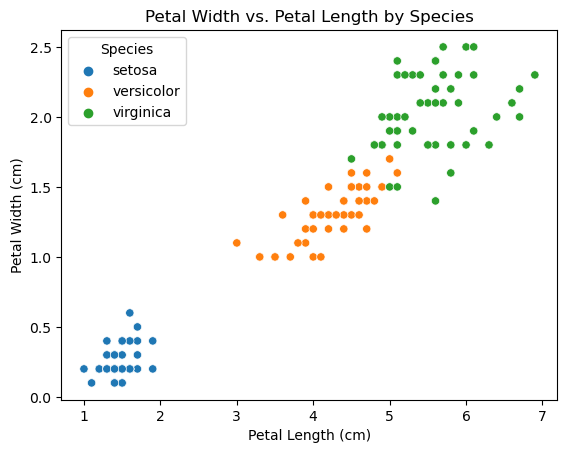

In [26]:
iris = sns.load_dataset("iris")
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Width vs. Petal Length by Species')
plt.legend(title='Species')
plt.show()

Let's focus on some simply binary classification for now, so let's drop the virginica flower and just look at trying to get a good classifier on the other two.

Are these features linearly separable? Can we get a perfect classifier on them?

Your answer here:

### Implement an SVM Classifier

In [27]:
iris_filtered = iris[iris['species'] != 'virginica']

X = iris_filtered[['petal_length', 'petal_width']].values
y = iris_filtered['species'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create an SVM classifier with a linear kernel
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# your code here
svm = SVC(kernel='linear')

# Fit the SVM classifier to the training data
# your code here
svm.fit(X, y)

SVC(kernel='linear')

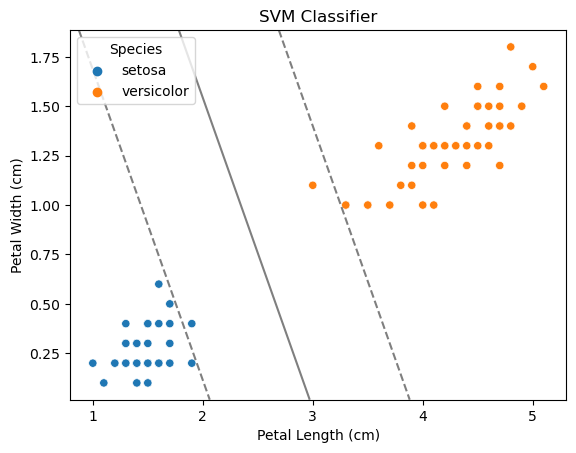

In [28]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Classifier')
plt.legend(title='Species')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.show()

### Implement a decision tree
- use veriscolor and virginica instead this time

In [29]:
iris = sns.load_dataset("iris")

iris_filtered = iris[iris['species'] != 'setosa']
X = iris_filtered[['petal_length', 'petal_width']].values
y = iris_filtered['species'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Create a Decision Tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# your code here
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X, y)



DecisionTreeClassifier()

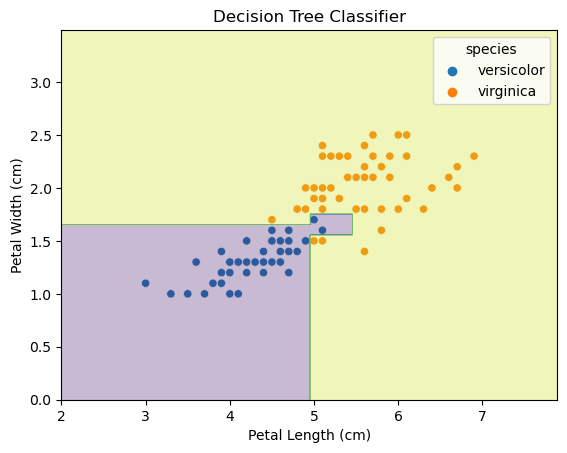

In [30]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Tree Classifier')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()


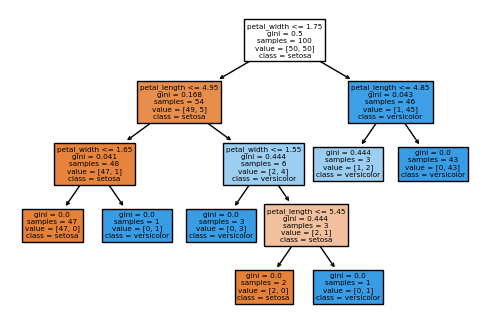

In [31]:
plt.figure(figsize=(6, 4))
plot_tree(tree_classifier, filled=True, feature_names=['petal_length', 'petal_width'], class_names=iris['species'].unique())
plt.show()

### Implement a bagging and a boosting classifier
- Use DecisionTreeClassifier as the base classifier

In [32]:
# Create a base classifier (e.g., Decision Tree)
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# your code here
tree_classifier = DecisionTreeClassifier()

# Create a BaggingClassifier using your DecisionTreeClassifier and 10 bootstrap samples
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
# your code here
bagging_classifier = BaggingClassifier(tree_classifier, n_estimators=10)

bagging_classifier.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

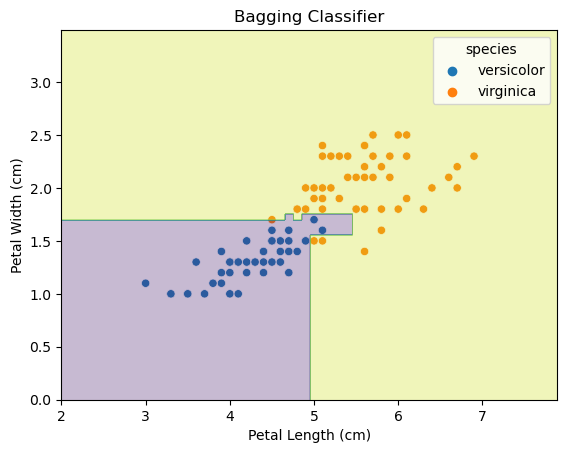

In [33]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Bagging Classifier')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = bagging_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()

In [34]:
# Create a base classifier (e.g., Decision Tree with depth 1)
# your code here
tree_classifier = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoostClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
# your code here
adaboost_classifier = AdaBoostClassifier(n_estimators=50)


adaboost_classifier.fit(X, y)

AdaBoostClassifier()

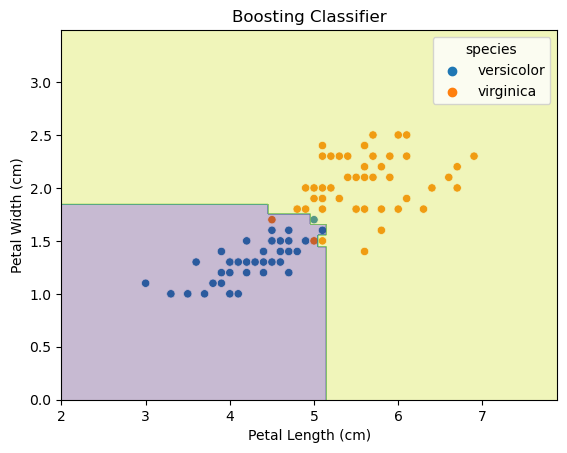

In [35]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Boosting Classifier')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = adaboost_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.show()

# Extension Questions
1. How many points are misclassified using the SVM approach when trained to tell versicolor and virginica apart using petal length and width?

2. Create a kmeans algorithm that aims to separate versicolor from virginica flowers.  What are the centers of your clusters? Hint: Use KMeans.cluster_centers_ 

In [36]:
iris_filtered = iris[iris['species'] != 'setosa']

X = iris_filtered[['petal_length', 'petal_width']].values
y = iris_filtered['species'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create an SVM classifier with a linear kernel
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# your code here
svm = SVC(kernel='linear')

# Fit the SVM classifier to the training data
# your code here
svm.fit(X, y)

SVC(kernel='linear')

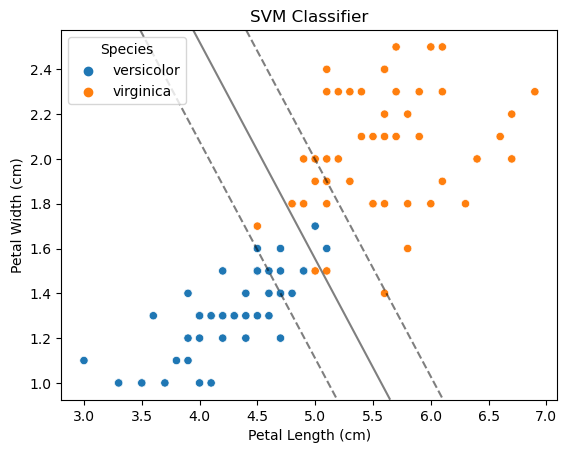

In [37]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Classifier')
plt.legend(title='Species')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.show()

In [38]:
# so 4 points are misclassified/on the wrong side of the boundary

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X,y)
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [41]:
kmeans.cluster_centers_.T

array([[5.59583333, 4.26923077],
       [2.0375    , 1.34230769]])

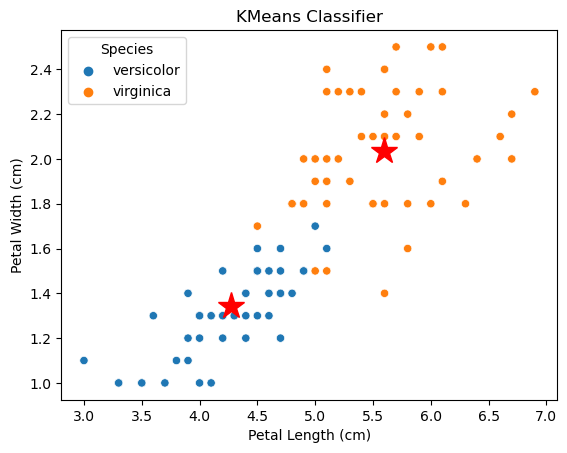

In [42]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_filtered)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Classifier')
plt.legend(title='Species')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


#plt.plot([2.0375,5.59583333], [1.34230769,4.26923077], marker='*', ls='none', ms=20)
plt.plot(kmeans.cluster_centers_.T[0], 
         kmeans.cluster_centers_.T[1], 
         marker='*', ls='none', ms=20,
         color="red")

plt.show()

In [22]:
# the red stars are the cluster centers